## Q3

In [129]:
import os.path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

In [130]:
tidy_data_path = './tidy-data'

In [131]:
files = os.listdir(tidy_data_path)
df = pd.read_csv(os.path.join(tidy_data_path,files[0]))

for e in files[1:]:
    if os.path.splitext(e)[1] == '.csv':
        df2 = pd.read_csv(os.path.join(tidy_data_path, e))
        df = pd.concat((df, df2), axis=0, join='inner')
        #print(e)
print(df.shape)

(219860, 17)


In [132]:
df.head()

,gamePk,eventIdx,eventTypeId,eventId,period,periodType,periodTime,dateTime,teamId,teamName,x,y,shotType,emptyNet,strength,shooter,goalie
0,2016020001,9,SHOT,8,1,REGULAR,01:11,2016-10-12T23:19:59Z,10,Toronto Maple Leafs,-77.0,5.0,Wrist Shot,NaN,NaN,Mitchell Marner,Craig Anderson
1,2016020001,16,SHOT,11,1,REGULAR,02:53,2016-10-12T23:21:41Z,9,Ottawa Senators,86.0,13.0,Wrist Shot,NaN,NaN,Chris Kelly,Frederik Andersen
2,2016020001,23,SHOT,15,1,REGULAR,04:01,2016-10-12T23:23:17Z,9,Ottawa Senators,23.0,-38.0,Wrist Shot,NaN,NaN,Cody Ceci,Frederik Andersen
3,2016020001,25,SHOT,16,1,REGULAR,04:46,2016-10-12T23:24:02Z,9,Ottawa Senators,33.0,-15.0,Slap Shot,NaN,NaN,Erik Karlsson,Frederik Andersen
4,2016020001,38,SHOT,24,1,REGULAR,06:46,2016-10-12T23:27:30Z,10,Toronto Maple Leafs,-34.0,28.0,Wrist Shot,NaN,NaN,Martin Marincin,Craig Anderson


In [133]:
import math

In [134]:
#cage coordination
goal_xy = np.array([89, 0])
# add two column to analysis
df['shotDistance'] = np.sqrt((abs(df['x'])-goal_xy[0])**2 + (df['y']-goal_xy[1])**2).round(0)
df['isGoal'] = df['eventTypeId'].apply(lambda x: 1 if x =='GOAL' else 0)

In [29]:
df = df[['gamePk', 'shotType','shotDistance','isGoal']]
print(df.shape)
df.head()

(219860, 4)


,gamePk,shotType,shotDistance,isGoal
0,2016020001,Wrist Shot,13.0,0
1,2016020001,Wrist Shot,13.0,0
2,2016020001,Wrist Shot,76.0,0
3,2016020001,Slap Shot,58.0,0
4,2016020001,Wrist Shot,62.0,0


In [36]:
df[df['isGoal']==1]

,gamePk,shotType,shotDistance,isGoal
0,2016020001,Wrist Shot,13.0,0
1,2016020001,Wrist Shot,13.0,0
2,2016020001,Wrist Shot,76.0,0
3,2016020001,Slap Shot,58.0,0
4,2016020001,Wrist Shot,62.0,0
...,...,...,...,...
861,2018010017,Wrist Shot,30.0,0
862,2018010017,Wrist Shot,10.0,0
863,2018010017,Slap Shot,62.0,0
864,2018010017,Wrist Shot,22.0,0


In [123]:
def distance_and_type_vs_goal(df, season=2020):

        df_concern = df.dropna().copy()
        df_new = df_concern[df_concern['gamePk'].apply(str).str.startswith(str(season))].copy()
        #print(df_new.shape)
        
        plot_data = df_new.groupby(["shotDistance", "shotType"])["isGoal"].mean().to_frame().reset_index()
        plot_data = plot_data[plot_data["shotDistance"] <= 100]

        hist_data = df_new[["shotDistance", "shotType","gamePk"]].groupby(
            ["shotDistance", "shotType"]).count().reset_index().copy()
        hist_data = hist_data[hist_data["shotDistance"] <= 100].copy()
        dict_hist = {}

        for i, shot_type in enumerate(hist_data["shotType"].unique()):
            dict_hist[i] = hist_data[hist_data["shotType"] == shot_type][["shotDistance", "gamePk"]].copy()
        g = sns.relplot(data=plot_data, x="shotDistance", y="isGoal", col="shotType",
                        kind="line", linewidth=1, col_wrap=2, facet_kws={'sharey': False, 'sharex': False})

        i = 0
        for ax in g.axes.flat:
            ax2 = ax.twinx()
            sns.histplot(data=dict_hist[i], x='shotDistance', y='gamePk', bins=100, ax=ax2,alpha = 0.5)
            ax.set_xlabel("shotDistance")
            ax.set_ylabel("goal probability")
            ax.set_xticks([0, 20, 40, 60, 80, 100])
            ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
            #ax2.set_yticks([25, 50, 75, 100, 125, 150])
            ax2.set_xticks([0, 20, 40, 60, 80, 100])
            ax2.set_ylabel('number of shot')
            i += 1
        plt.subplots_adjust(hspace=0.2, wspace=0.3)
        g.fig.subplots_adjust(top=0.95)
        g.fig.suptitle('Goal probability of shot type on shot distance for Season {}-{}'.format(season,season+1))
        plt.show()


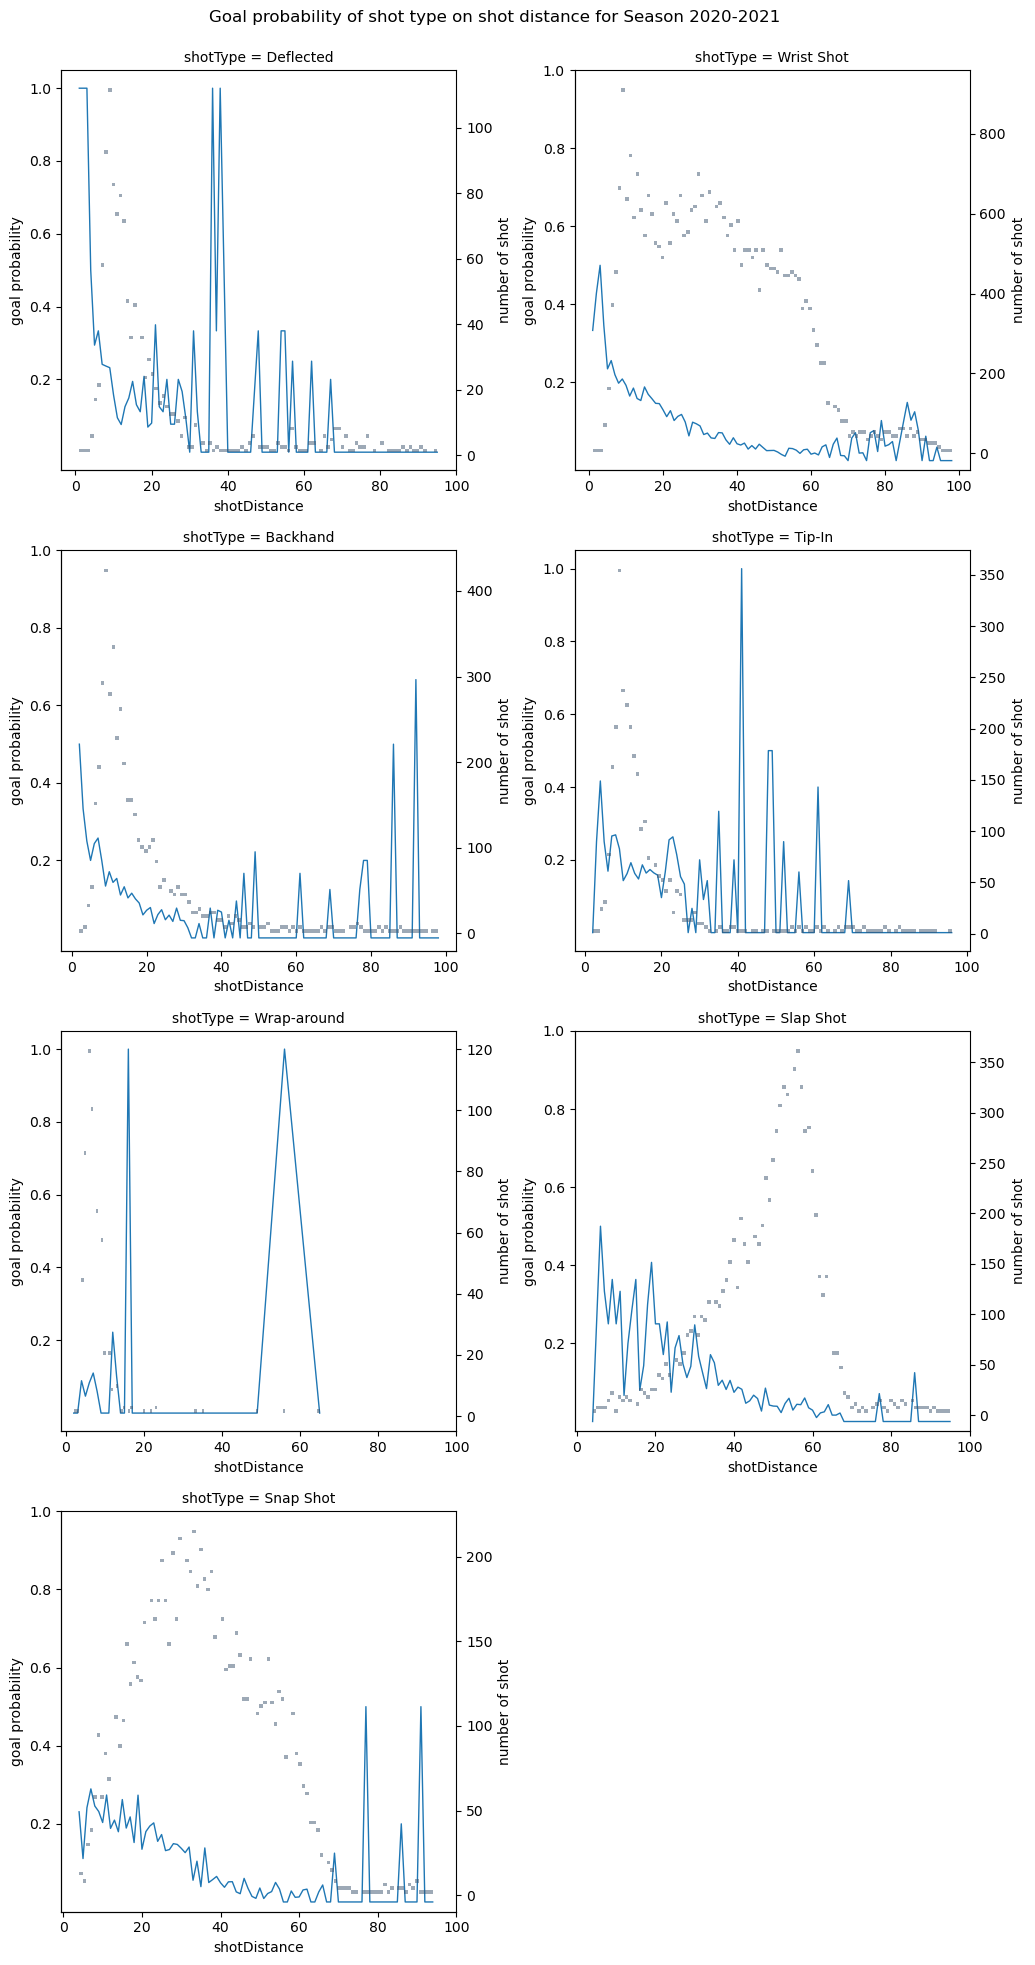

In [124]:
distance_and_type_vs_goal(df,2020)

## Discussion of Simple Visualizations Q3

We took the 2020-2021 season as an example, and plotted the relationship between the goal ratio (goal/shot) and the distance to the goal under 7 shot types. The x-axis is the goal distance, the blue line corresponds to the left y-axis is the percentage of goals scored (we can ignore the cusp as this usually corresponds to a successful goal at that distance), the grey dot corresponds to the right y-axis is the goal score number of balls.   
Through comparative image analysis, we found that the type of most dangerous goal inferred in Q1 to be the **backhand** does not appear to be accurate. Although the backhand has the highest rate of goals. But combined with the goal distance, we can see that the **deflected**, **wrist shot**，**backhand** and **tip-in** has a concentrated distribution of goals and a relatively high success rate (about 0.3) within 40 yards of the cage.  
Among them, **wrist shot** has a higher number of shots, so we think it's the more dangerous type of goal. Although it is the most goal type, it is also the most effective, which is masked in Q1 as the rest of its shots away from the cage are also of this type, reducing its overall success rate.  
In addition, **snap-shot** and **slap-shot** have a concentrated distribution of goals over relatively long distances to cage, but combined with the success rate, they are not particularly threatening.